##디렉터리 확인

In [30]:
import os
os.getcwd()

'/content'

##코드

##필요한 모듈 불러오기

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

##데이터프레임 함수

N월을 입력으로 받아 해당 월의 데이터를 return 해주는 함수

In [ ]:
month_data=None#파이 차트에 사용될 함수
f_name=None#파일을 불러올 때 쓰이는 함수
def month_import(month):
  global df
  global month_data
  global f_name
  if month.lower()=='january':
    f_name='data/bus_station_month_january.csv'
    month_data='1월'
  elif month.lower()=='february':
    f_name='data/bus_station_month_february.csv'
    month_data='2월'
  elif month.lower()=='march':
    f_name='data/bus_station_month_march.csv'
    month_data='3월'
  elif month.lower()=='april':
    f_name='data/bus_station_month_april.csv'
    month_data='4월'
  elif month.lower()=='may':
    f_name='data/bus_station_month_may.csv'
    month_data='5월'
  elif month.lower()=='june':
    f_name='data/bus_station_month_june.csv'
    month_data='6월'
  elif month.lower()=='july':
    f_name='data/bus_station_month_july.csv'
    month_data='7월'
  elif month.lower()=='augusut':
    f_name='data/bus_station_month_august.csv'
    month_data='8월'
  else:
    raise ValueError("잘못 입력하셨습니다.")
  df=pd.read_csv(f_name,encoding='cp949')
  return df

##분석하고자 하는 데이터의 세팅

In [42]:
choose_month='january'##각 월 데이터
bus_name='4432'#버스노선번호
df=month_import(choose_month)#(이 셀을 다시 실행하여 데이터 세팅을 재설정함.)
if df.empty:#(디버그 용도)
  raise ValueError('데이터가 존재하지 않습니다.')

##각 월 데이터에서 모든 정류장중에서 승차/하차 승객의 비율이 가장 큰 정류장에 대한 파이차트 표시

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

1684.0 관악10(아카시아마을.민방위교육장~신림역) 2
정류장의 승차승객수:  6736
정류장의 하차승객수:  4


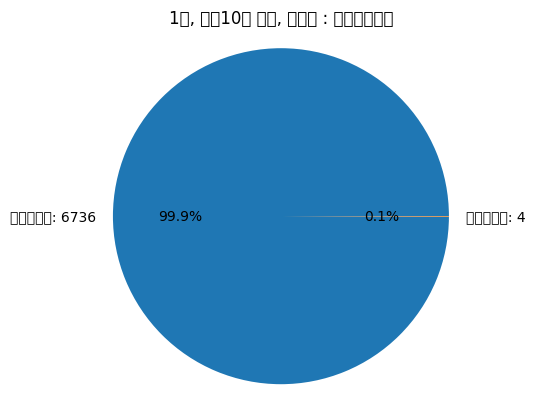

In [37]:
mx=0
rate=0
busStop_name=None#버스정류장이름
busStop_id=None#버스정류장ID
busline_info=None#버스노선정보
riding=None#승차승객수
getoff=None#하차승객수
bus_name=None#버스노선
for index,row in df.iterrows():
  for i in range(6,8):
    row[i]=int(row[i])
  if row[7]!=0:#0인 경우 계산하지 않음.
    rate=row[6]/row[7]
    if rate>mx:#만약 rate가 mx보다 클 경우 함수 값 다시 지정
      mx=rate
      busStop_name=row[5]
      busline_info=row[3]
      busStop_id=row[4]
      riding=row[6]
      getoff=row[7]
      bus_name=row[2]
print(mx,busline_info,busStop_id)
print("정류장의 승차승객수: ",riding)
print("정류장의 하차승객수: ",getoff)
df2=df[df["노선명"]==busline_info]
for index, row in df2.iterrows():#승차/하차 승객 비율이 가장 큰 정류장에 대한 파이차트
  if busStop_id == row[4]:
    plt.figure(dpi=100)
    plt.rc('font', family='Malgun Gothic')
    plt.title("%s, %s번 버스, 정류장 : %s"%(month_data,bus_name,row[5]))
    values=row[6:8]
    labels=['승차승객수','하차승객수']
    data_labels=[f"{label}: {value}" for label,value in zip(labels,values)]
    plt.pie(values, labels=data_labels, autopct='%.1f%%')
    plt.axis('equal')
    plt.show()

##각 월 데이터에서 버스노선의 전체 정류장중에서 승차/하차 승객의 비율이 가장 큰 정류장에 대한 파이차트 표시

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

85.08771929824562 4432번(개포동~옛골) 2
정류장의 승차승객수:  4850
정류장의 하차승객수:  57


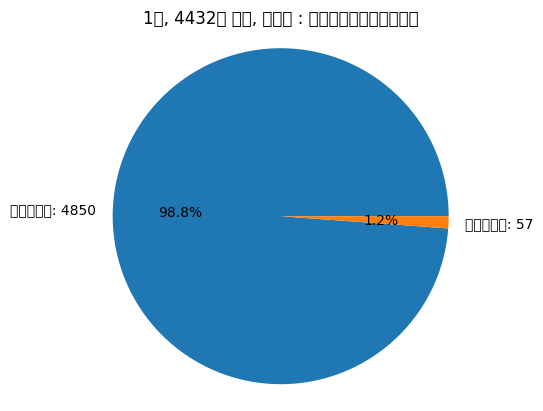

In [39]:
df2=df[df['노선번호']==bus_name]
if df2.empty:#(디버그 용도)
  raise ValueError("입력한 버스 노선 데이터가 %s 파일에 존재하지 않습니다."%(f_name))
mx=0#가장 큰 승차/하차 승객수를 저장할 값.
rate=0#승차/하차 승객수
busStop_name=None#버스정류장이름
busStop_id=None#버스정류장ID
busline_info=None#버스노선정보
riding=None#승차승객수
getoff=None#하차승객수
for index,row in df2.iterrows():
  for i in range(6,8):
    row[i]=int(row[i])
  if row[7]!=0:
    rate=row[6]/row[7]
    if rate>mx:
      mx=rate
      busStop_name=row[5]
      busline_info=row[3]
      busStop_id=row[4]
      riding=row[6]
      getoff=row[7]
print(mx,busline_info,busStop_id)
print("정류장의 승차승객수: ",riding)
print("정류장의 하차승객수: ",getoff)
df3=df2[df2["버스정류장ID"]==busStop_id]
for index, row in df3.iterrows():#승차/하차 승객 비율이 가장 큰 정류장에 대한 파이차트
  if bus_name in row['노선번호']:
    plt.figure(dpi=100)
    plt.title("%s, %s번 버스, 정류장 : %s"%(month_data,bus_name,row[5]))
    values=row[6:8]
    labels=['승차승객수','하차승객수']
    data_labels=[f"{label}: {value}" for label,value in zip(labels,values)]
    plt.pie(values, labels=data_labels, autopct='%.1f%%')
    plt.axis('equal')
    plt.show()

##각 월 데이터에서 한 버스노선에 대한 전체 정류장의 승하차승객 파이차트 표시

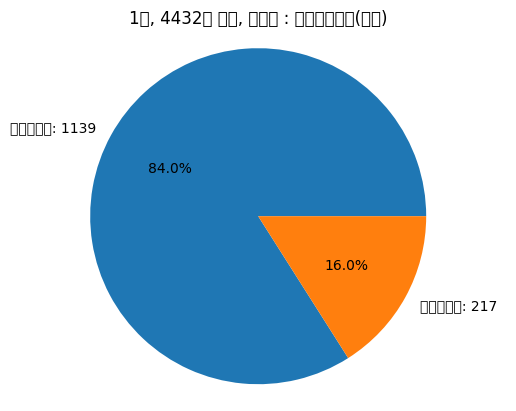

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

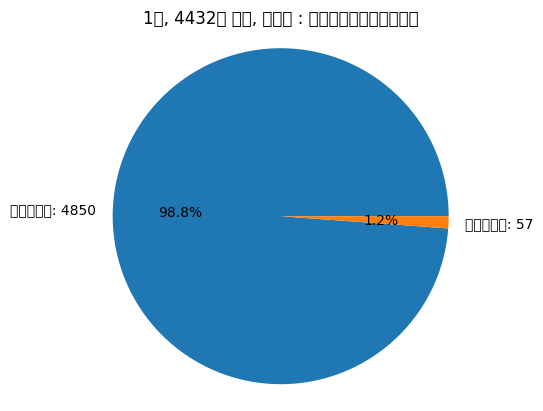

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


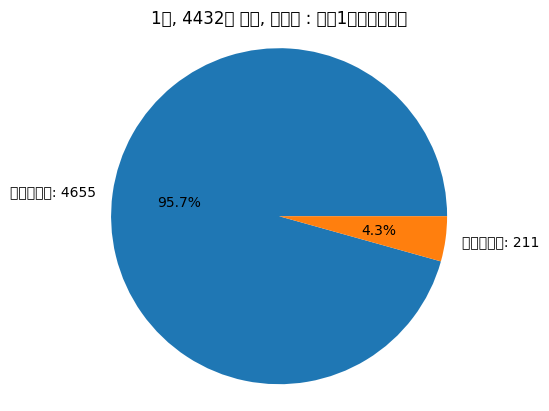

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


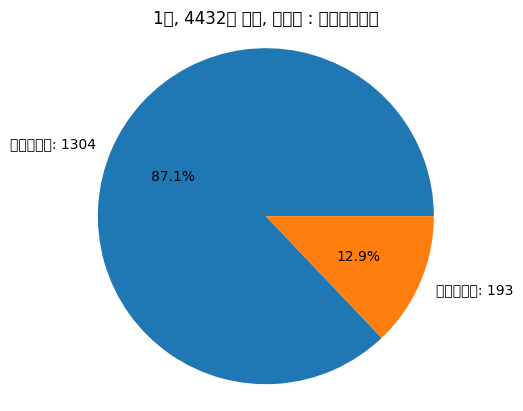

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50526 (\N{HANGUL SYLLABLE AP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


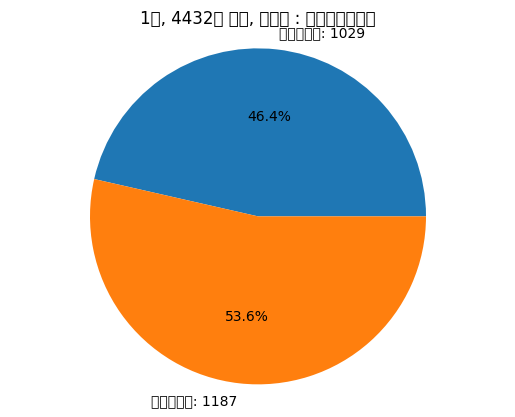

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

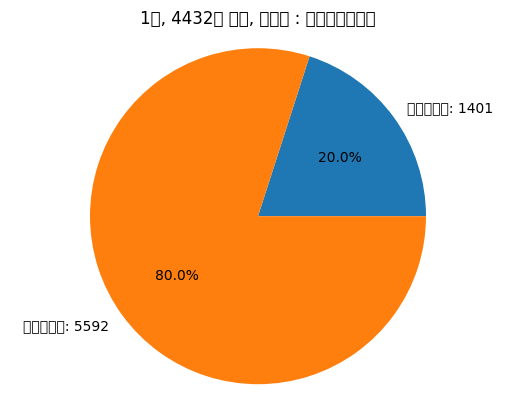

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


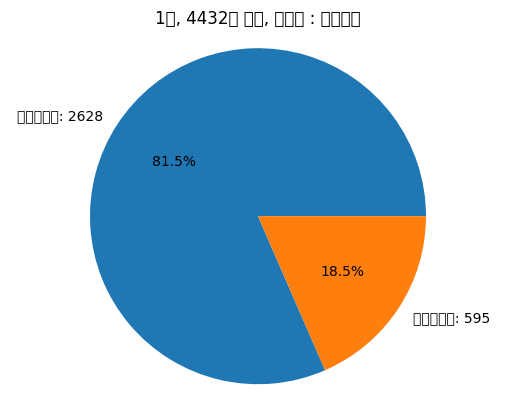

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


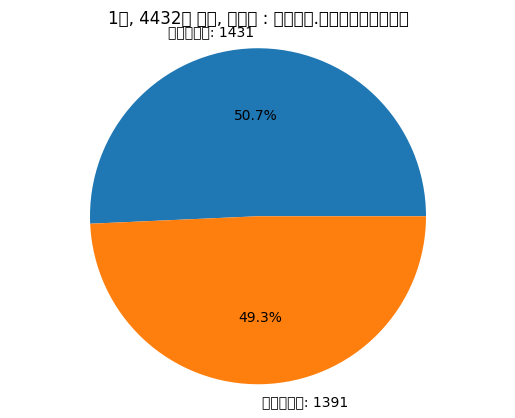

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


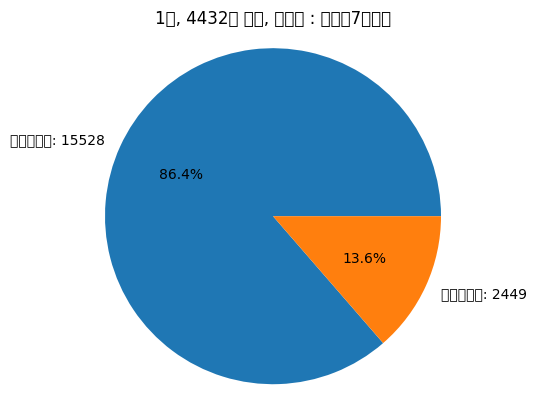

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

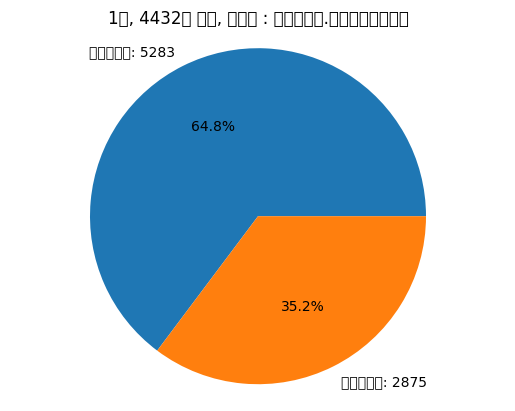

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

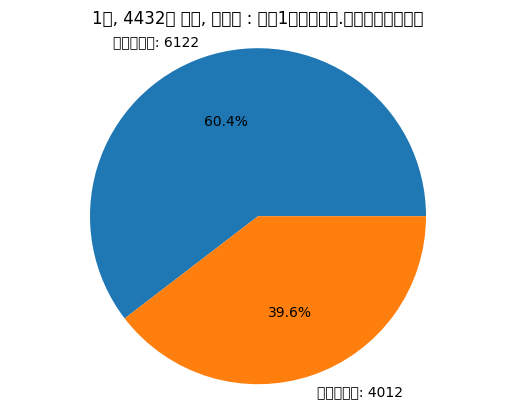

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47085 (\N{HANGUL SYLLABLE REOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

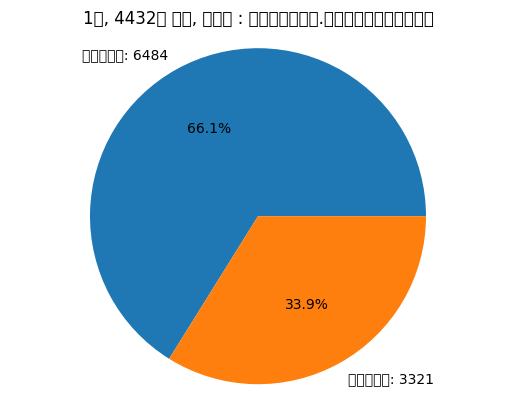

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48197 (\N{HANGUL SYLLABLE BAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


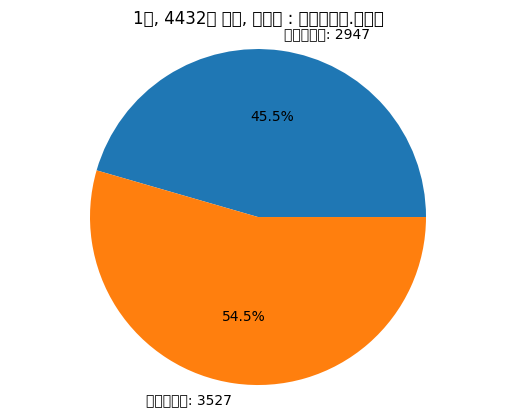

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


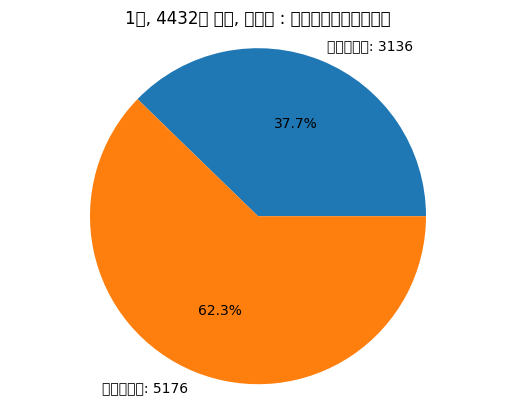

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


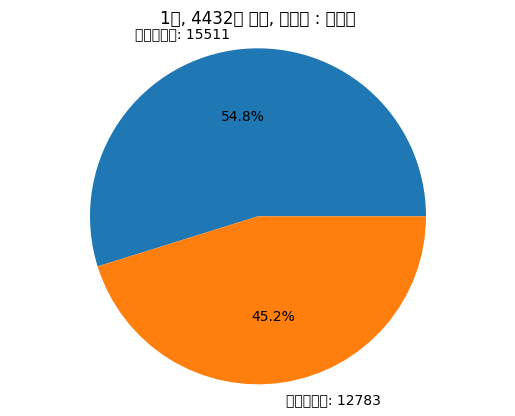

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


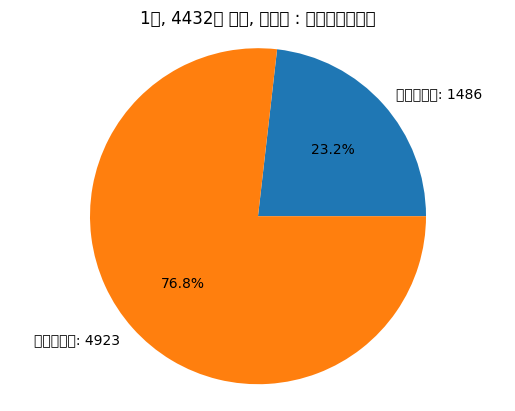

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


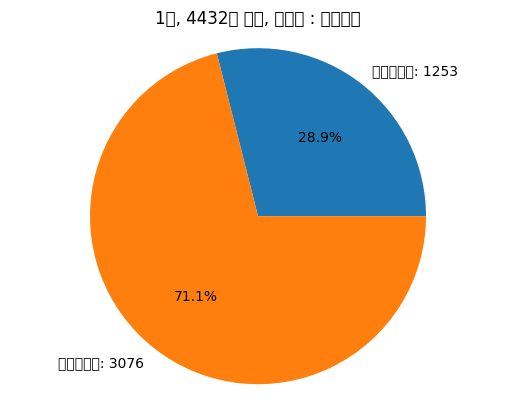

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


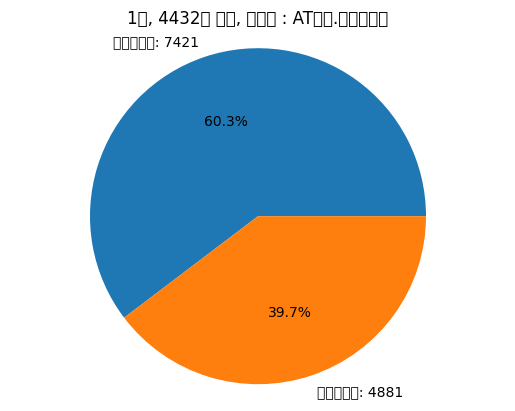

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


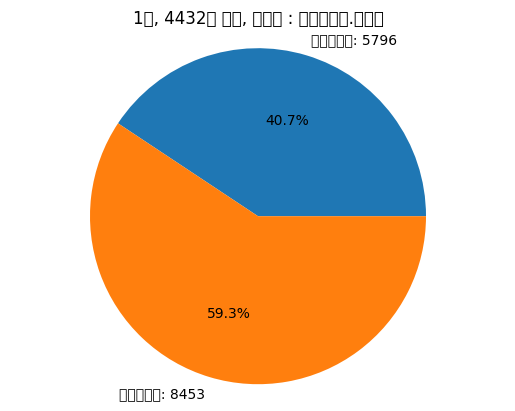

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


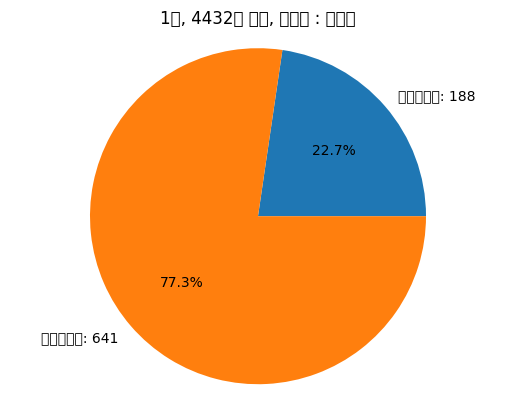

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


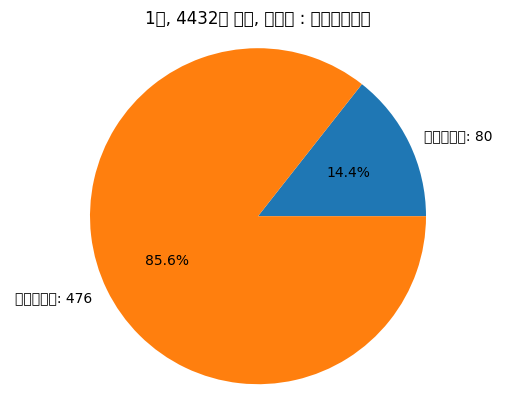

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


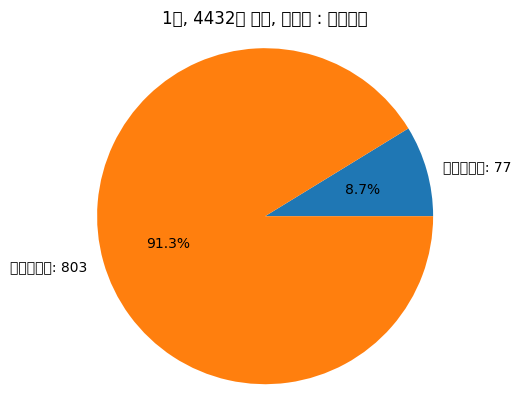

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


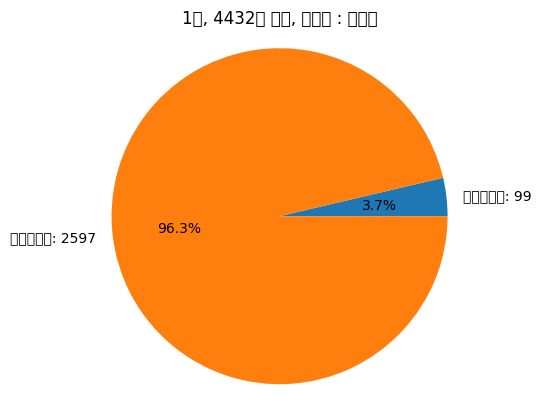

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


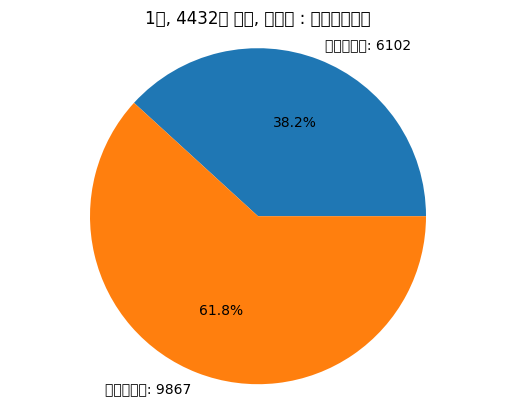

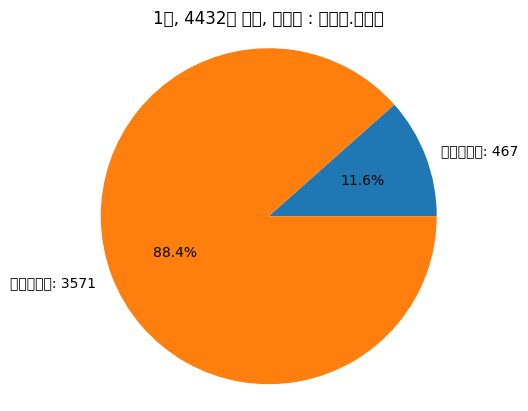

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


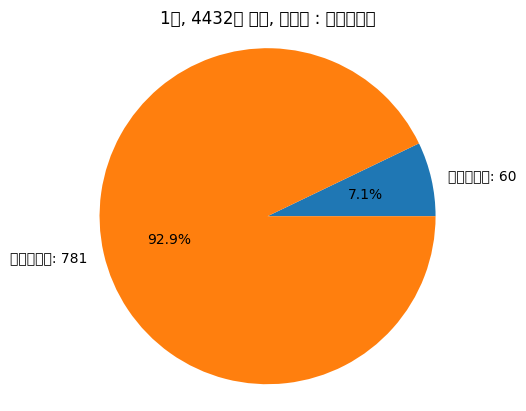

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51137 (\N{HANGUL SYLLABLE JAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


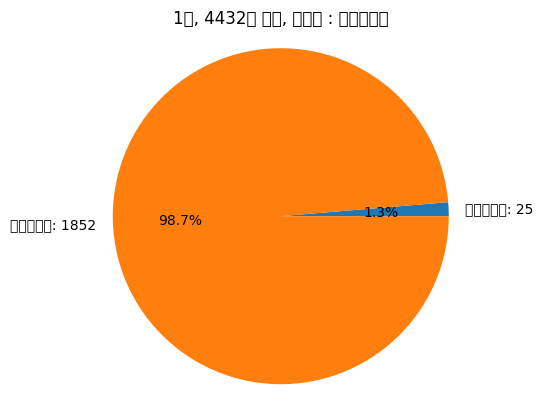

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50715 (\N{HANGUL SYLLABLE YES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


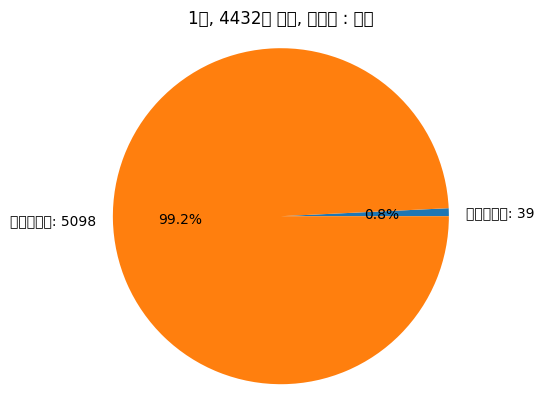

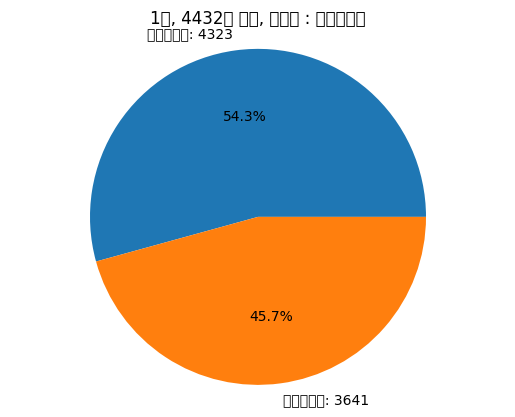

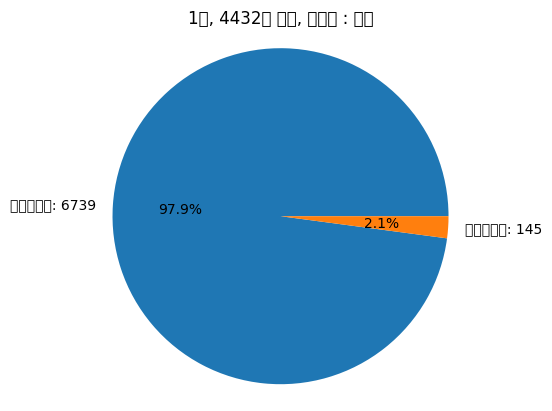

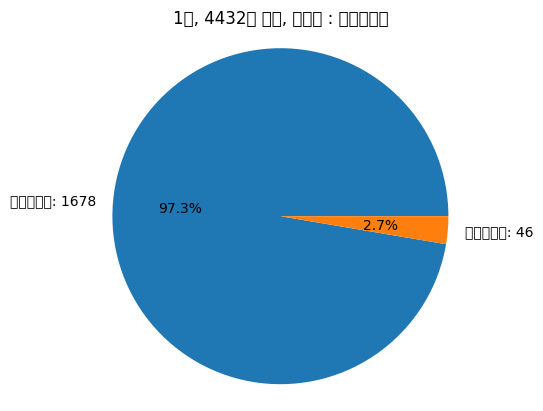

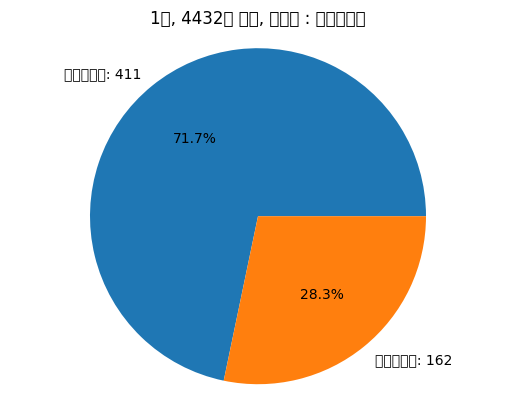

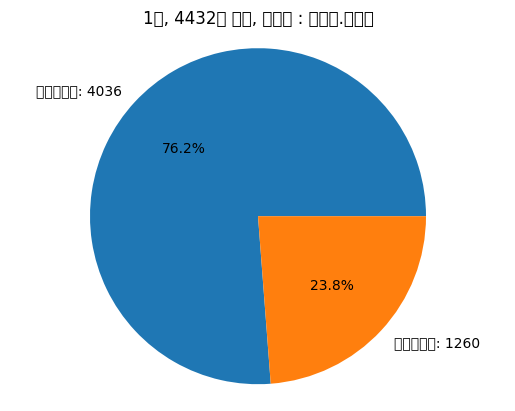

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


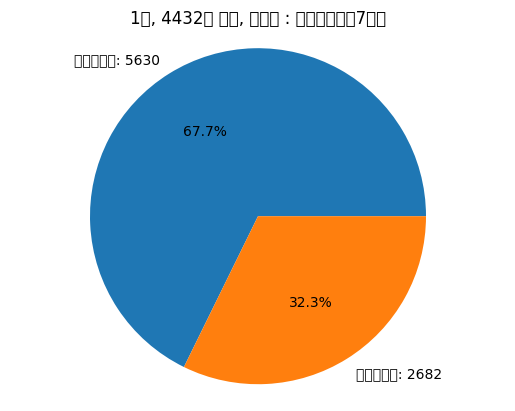

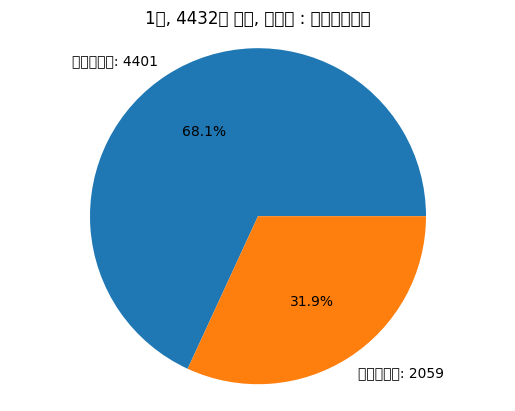

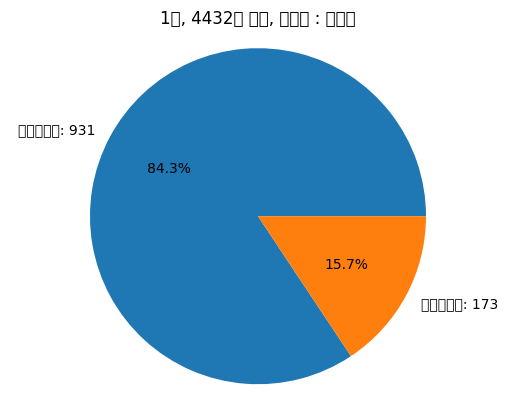

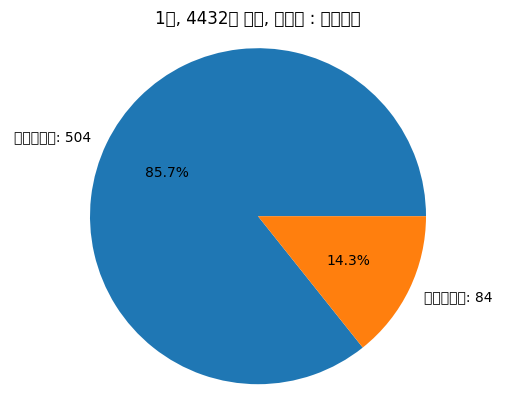

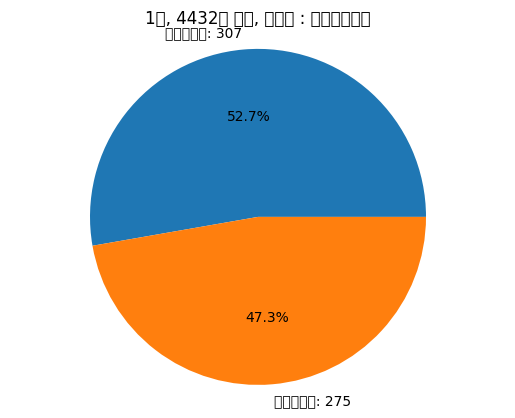

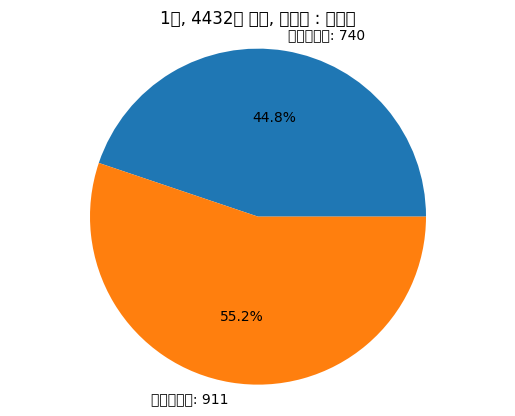

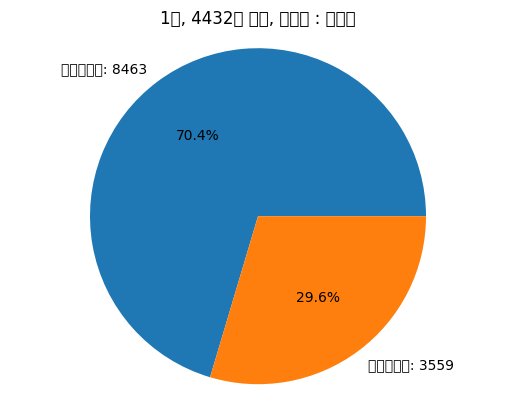

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


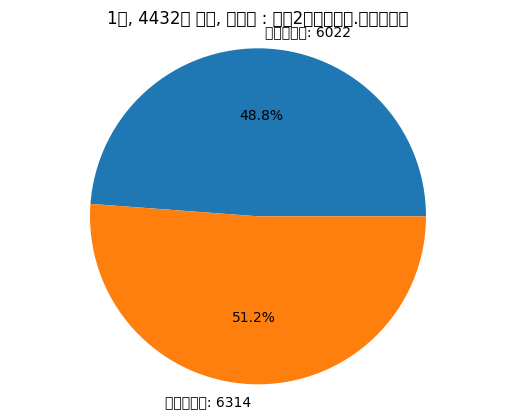

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


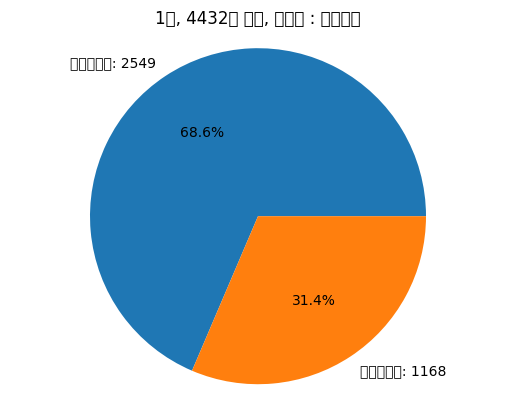

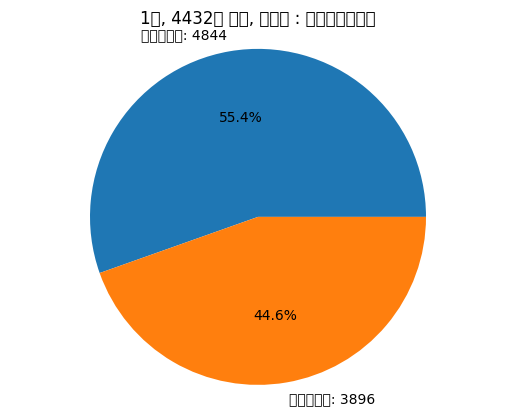

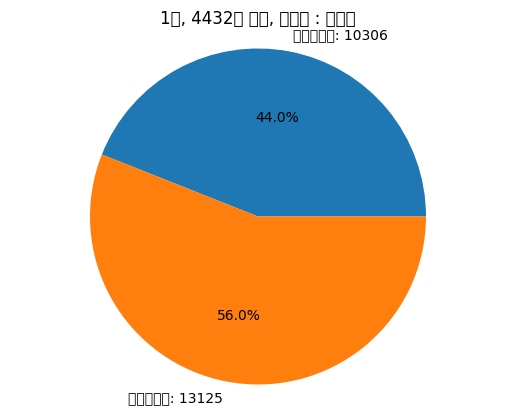

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


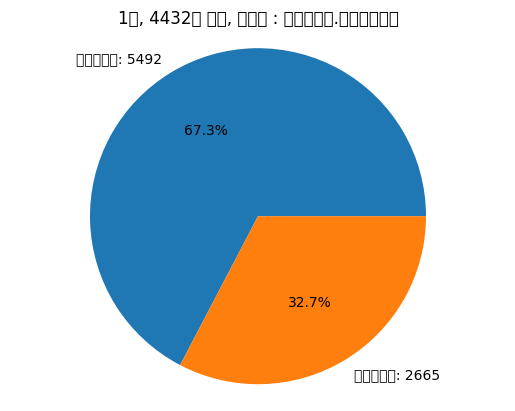

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


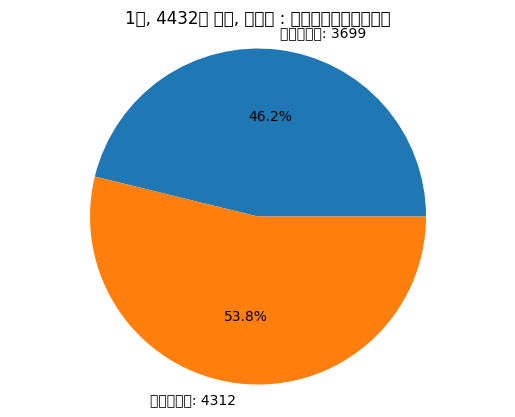

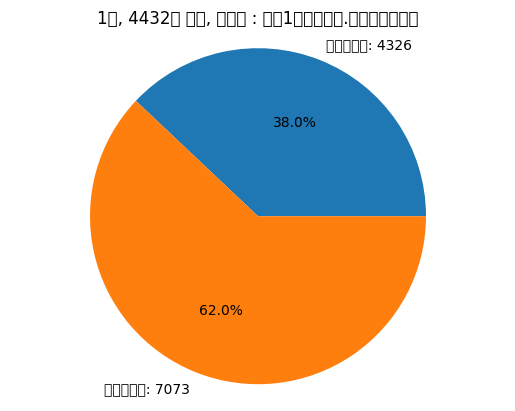

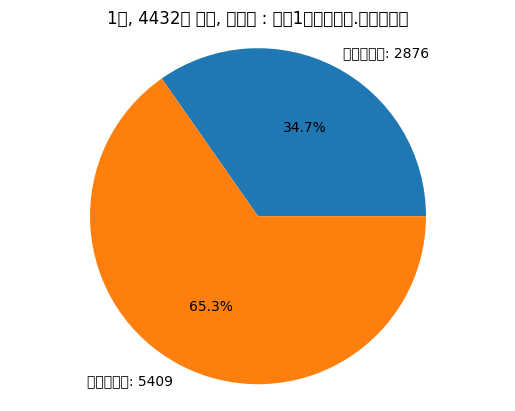

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


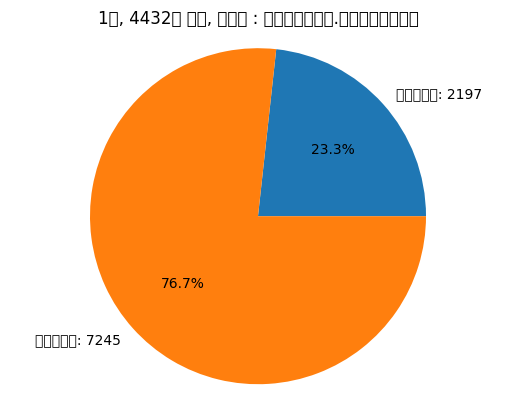

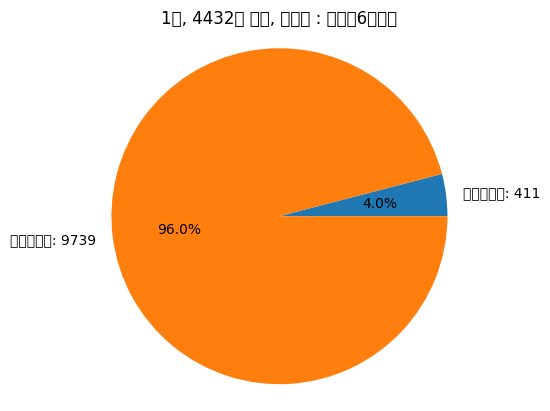

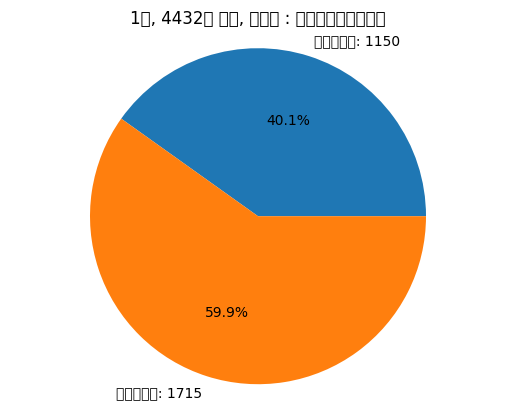

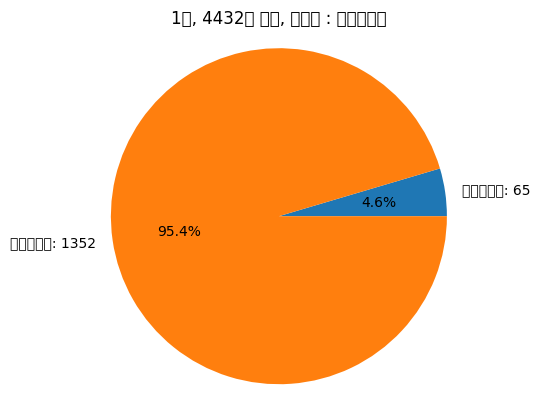

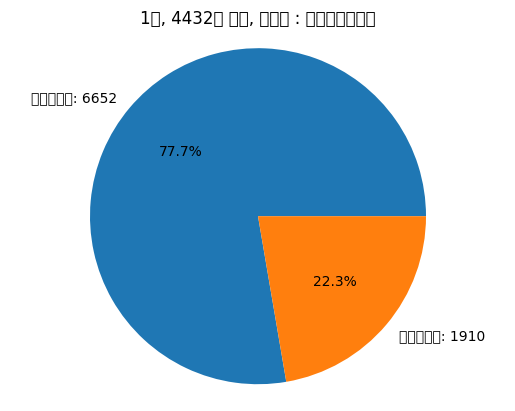

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47329 (\N{HANGUL SYLLABLE RYONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


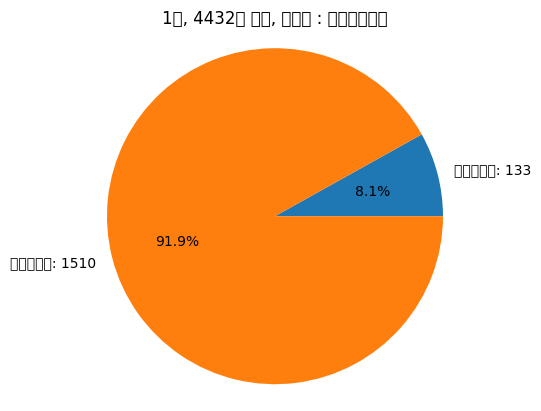

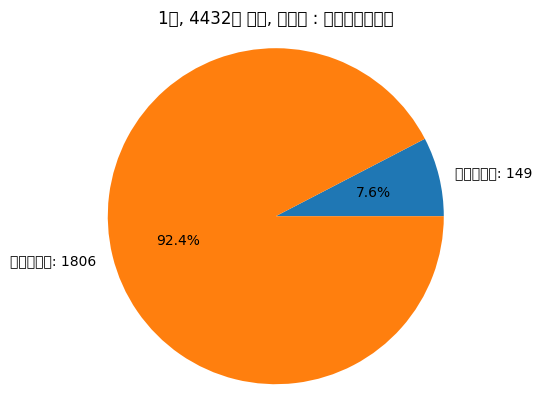

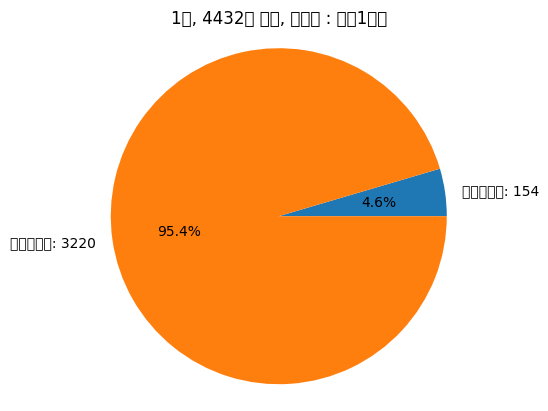

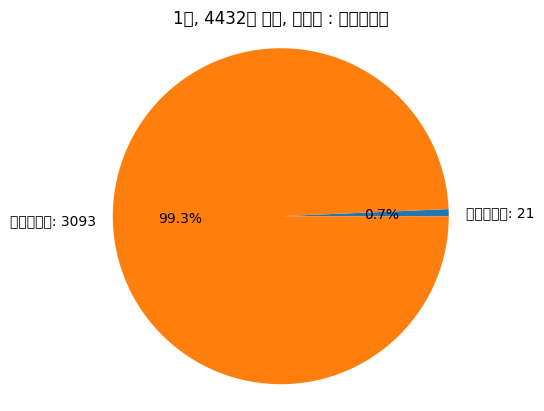

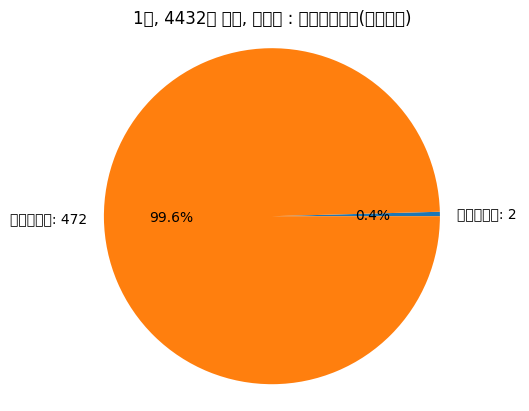

In [44]:
df2=df[df['노선번호']==bus_name]
if df2.empty:#(디버그 용도)
  raise ValueError("입력한 버스 노선 데이터가 %s 파일에 존재하지 않습니다."% f_name)
for index, row in df2.iterrows():
  if bus_name in row['노선번호']:
    plt.figure(dpi=100)
    plt.rc('font',family='Malgun Gothic')
    plt.title("%s, %s번 버스, 정류장 : %s"%(month_data,bus_name,row[5]))
    values=row[6:8]
    labels=['승차승객수','하차승객수']
    data_labels=[f"{label}: {value}" for label,value in zip(labels,values)]
    plt.pie(values, labels=data_labels, autopct='%.1f%%')
    plt.axis('equal')
    plt.show()

##각 월 데이터에서 버스노선의 전체 정류장중에서 하차/승차 승객의 비율이 가장 큰 정류장에 대한 파이차트 표시

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

236.0 4432번(개포동~옛골) 58
정류장의 승차승객수:  2
정류장의 하차승객수:  472


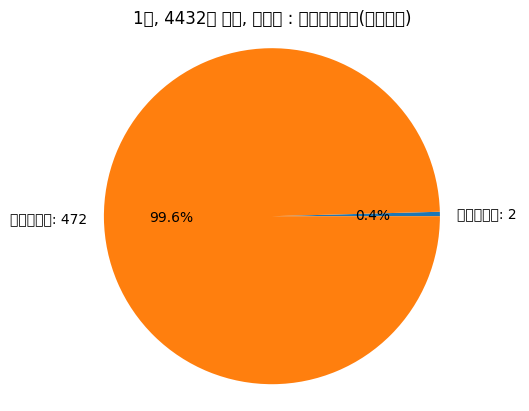

In [43]:
df2=df[df['노선번호']==bus_name]
if df2.empty:#(디버그 용도)
  raise ValueError("입력한 버스 노선 데이터가 %s 파일에 존재하지 않습니다."%(f_name))
mx=0#가장 큰 하차/승차 승객수를 저장할 값.
rate=0#하차/승차 승객수
busStop_name=None#버스정류장이름
busStop_id=None#버스정류장ID
busline_info=None#버스노선정보
riding=None#승차승객수
getoff=None#하차승객수
for index,row in df2.iterrows():
  for i in range(6,8):
    row[i]=int(row[i])
  if row[6]!=0:
    rate=row[7]/row[6]
    if rate>mx:
      mx=rate
      busStop_name=row[5]
      busline_info=row[3]
      busStop_id=row[4]
      riding=row[6]
      getoff=row[7]
print(mx,busline_info,busStop_id)
print("정류장의 승차승객수: ",riding)
print("정류장의 하차승객수: ",getoff)
df3=df2[df2["버스정류장ID"]==busStop_id]
for index, row in df3.iterrows():#승차/하차 승객 비율이 가장 큰 정류장에 대한 파이차트
  if bus_name in row['노선번호']:
    plt.figure(dpi=100)
    plt.title("%s, %s번 버스, 정류장 : %s"%(month_data,bus_name,row[5]))
    values=row[6:8]
    labels=['승차승객수','하차승객수']
    data_labels=[f"{label}: {value}" for label,value in zip(labels,values)]
    plt.pie(values, labels=data_labels, autopct='%.1f%%')
    plt.axis('equal')
    plt.show()

##각 월 데이터에서 모든 정류장중에서 하차/승차 비율이 높은 정류장에 대한 파이차트 표시

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

3545.0 604번(신월동~중구청) 19
정류장의 승차승객수:  1
정류장의 하차승객수:  3545


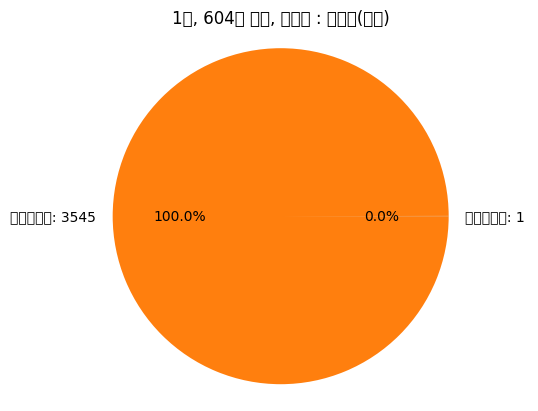

In [35]:
mx=0#가장 큰 하차/승차 승객수를 저장할 값.
rate=0#하차/승차 승객수
busStop_name=None#버스정류장이름
busStop_id=None#버스정류장ID
busline_info=None#버스노선정보
riding=None#승차승객수
getoff=None#하차승객수
bus_name=None#버스노선
for index,row in df.iterrows():
  for i in range(6,8):
    row[i]=int(row[i])
  if row[6]!=0:#0인 경우 계산하지 않음.
    rate=row[7]/row[6]
    if rate>mx:#만약 rate가 mx보다 클 경우 함수 값 다시 지정
      mx=rate
      busStop_name=row[5]
      busline_info=row[3]
      busStop_id=row[4]
      riding=row[6]
      getoff=row[7]
      bus_name=row[2]
print(mx,busline_info,busStop_id)
print("정류장의 승차승객수: ",riding)
print("정류장의 하차승객수: ",getoff)
df2=df[df["노선명"]==busline_info]
for index,row in df2.iterrows():#승차/하차 승객 비율이 가장 큰 정류장에 대한 파이차트
  if busStop_id == row[4]:
    plt.figure(dpi=100)
    plt.rc('font', family='Malgun Gothic')
    plt.title("%s, %s번 버스, 정류장 : %s"%(month_data,bus_name,row[5]))
    values=row[6:8]
    labels=['승차승객수','하차승객수']
    data_labels=[f"{label}: {value}" for label,value in zip(labels,values)]
    plt.pie(values, labels=data_labels, autopct='%.1f%%')
    plt.axis('equal')
    plt.show()

#모든 정류장 중 하차 승객이 많은 곳과 적은 곳 TOP 3

In [34]:
sorted_df=df.sort_values(by='하차승객수',ascending=False)
sorted_df2=df.sort_values(by='하차승객수')
print("하차 승객이 많은 정류장")
display(sorted_df[:3])
print('하차 승객이 적은 정류장')
display(sorted_df2[:3])

하차 승객이 많은 정류장


,사용월,노선ID,노선번호,노선명,버스정류장ID,버스정류장명,승차승객수,하차승객수
35572,23-Jan,11110562,금천03,금천03(가산디지털단지역~구로디지털단지역),16,구로디지털단지역(중),80869,92525
35587,23-Jan,11110562,금천03,금천03(가산디지털단지역~구로디지털단지역),31,가산디지털단지역,778,86376
35476,23-Jan,11110735,금천01,금천01(청.독산역~벽산아파트),14,벽산아파트5단지,32459,73831


하차 승객이 적은 정류장


,사용월,노선ID,노선번호,노선명,버스정류장ID,버스정류장명,승차승객수,하차승객수
30990,23-Jan,11110457,N51,N51번(시흥동차고지~하계동차고지),5,시흥사거리.대명시장,137,0
29912,23-Jan,11110365,N16,N16번(도봉산공영차고지~온수동차고지),72,궁동청소년문화의집.구로검사소,74,0
29911,23-Jan,11110365,N16,N16번(도봉산공영차고지~온수동차고지),71,우신고등학교,108,0


#모든 정류장 중 승차 승객이 많은 곳과 적은 곳 TOP 3

In [33]:
sorted_df=df.sort_values(by='승차승객수',ascending=False)
sorted_df2=df.sort_values(by='승차승객수')
print('승차 승객수가 많은 정류장')
display(sorted_df[:3])
print('승차 승객수가 적은 정류장')
display(sorted_df2[:3])

승차 승객수가 많은 정류장


,사용월,노선ID,노선번호,노선명,버스정류장ID,버스정류장명,승차승객수,하차승객수
35557,23-Jan,11110562,금천03,금천03(가산디지털단지역~구로디지털단지역),1,가산디지털단지역,101376,1126
39756,23-Jan,11110696,양천01,양천01(등촌역~당산역),19,당산역.지하철2호선,89512,67840
36550,23-Jan,11110590,동대문01,동대문01(회기역~경희대),1,회기역,86138,47009


승차 승객수가 적은 정류장


,사용월,노선ID,노선번호,노선명,버스정류장ID,버스정류장명,승차승객수,하차승객수
32675,23-Jan,11110467,N72,N72중랑 (중랑공영차고지~은평공영차고지),172,중랑공영차고지(가상),0,1
3769,23-Jan,11110944,1226,1226번(월곡중학교~경동시장),20,월곡래미안루나밸리,0,309
14222,23-Jan,11110932,4433,4433번(대치역~양재역),37,대치역(종점가상),0,3
